<a href="https://colab.research.google.com/github/romenlaw/ML-playground/blob/main/titanic_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00


In [2]:
!rm -f data/*
!wget -nv -P data https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_13_End_to_end_example/titanic.csv
!ls -al data
!wc -l data/*.csv

2025-03-30 08:43:30 URL:https://raw.githubusercontent.com/luisguiserrano/manning/master/Chapter_13_End_to_end_example/titanic.csv [61194/61194] -> "data/titanic.csv" [1]
total 68
drwxr-xr-x 2 root root  4096 Mar 30 08:43 .
drwxr-xr-x 1 root root  4096 Mar 30 08:43 ..
-rw-r--r-- 1 root root 61194 Mar 30 08:43 titanic.csv
892 data/titanic.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Preprocess Data

See data dictionary in [https://www.kaggle.com/code/jamesleslie/titanic-neural-network-for-beginners/input]

In [4]:
df = pd.read_csv('./data/titanic.csv') #, index_col='PassengerId')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## drop columns

drop columns that are unique per record.

In [5]:
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

## deal with NaN fields

In [6]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Cabin,687
Embarked,2


In [7]:
# Cabin has too many NaN records, drop it
df = df.drop(['Cabin'], axis=1)

In [8]:
# use median age for missing Age
df['Age'] = df['Age'].fillna( df['Age'].median() )
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [9]:
# for the unknow embarked port, put U for unknown
df['Embarked'] = df['Embarked'].fillna('U')
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [10]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


## categorise data

        Survival Count  Mortality Count  Survaval Ratio %
Pclass                                                   
1                  136               80         62.962963
2                   87               97         47.282609
3                  119              372         24.236253


<Figure size 300x200 with 0 Axes>

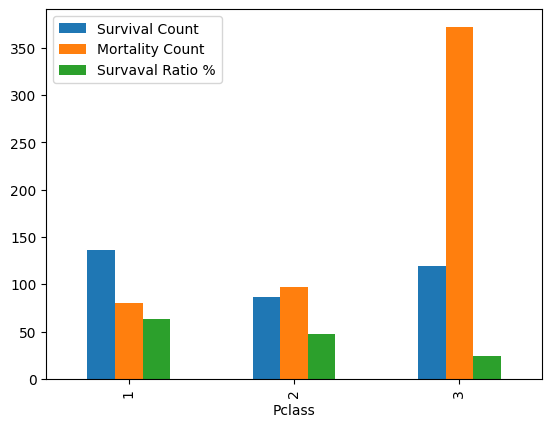

In [11]:
# Pclass

# calculate survival rate of each pclass:
pclass_survival_count = df.query('Survived == 1')['Pclass'].value_counts().sort_index()
pclass_mortal_count = df.query('Survived == 0')['Pclass'].value_counts().sort_index()
pclass_survival_ratio = pclass_survival_count / (pclass_survival_count + pclass_mortal_count) * 100

pclass_stats = pd.concat([pclass_survival_count, pclass_mortal_count, pclass_survival_ratio],
                         keys=['Survival Count', 'Mortality Count', 'Survaval Ratio %'], axis=1)
print(pclass_stats)

plt.figure(figsize=(3,2))
pclass_stats.plot(kind='bar')
plt.show()

By the look of the above, there seems to have some ordinality of Pclass on survival rate. So leave it as is.

In [12]:
# Sex only has 2 values, so turn them into 0 or 1
df['Sex'] = df['Sex'].astype('category').cat.codes
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [13]:
# subset all categorical variables which need to be encoded
categorical = ['Embarked']

for var in categorical:
  df = pd.concat([df, pd.get_dummies(df[var], prefix=var, dtype='long')], axis=1)
  del df[var]

In [14]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0,3,1,22.0,1,0,7.2500,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1,0
3,1,1,0,35.0,1,0,53.1000,0,0,1,0
4,0,3,1,35.0,0,0,8.0500,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,0,1,0
887,1,1,0,19.0,0,0,30.0000,0,0,1,0
888,0,3,0,28.0,1,2,23.4500,0,0,1,0
889,1,1,1,26.0,0,0,30.0000,1,0,0,0


## scale continous columns

In [15]:
## scale continuous columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cont = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

for c in cont:
  df[c] = df[c].astype('float64')
  df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))

In [16]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,-8.772133e-17,1.000562,-1.566107,-0.369365,0.827377,0.827377,0.827377
Sex,891.0,6.475870e-01,0.477990,0.000000,0.000000,1.000000,1.000000,1.000000
Age,891.0,2.272780e-16,1.000562,-2.224156,-0.565736,-0.104637,0.433312,3.891554
SibSp,891.0,4.386066e-17,1.000562,-0.474545,-0.474545,-0.474545,0.432793,6.784163
Parch,891.0,5.382900e-17,1.000562,-0.473674,-0.473674,-0.473674,-0.473674,6.974147
Fare,891.0,3.987333e-18,1.000562,-0.648422,-0.489148,-0.357391,-0.024246,9.667167
Embarked_C,891.0,1.885522e-01,0.391372,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked_Q,891.0,8.641975e-02,0.281141,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked_S,891.0,7.227834e-01,0.447876,0.000000,0.000000,1.000000,1.000000,1.000000


In [17]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Embarked_U
0,0,0.827377,1,-0.565736,0.432793,-0.473674,-0.502445,0,0,1,0
1,1,-1.566107,0,0.663861,0.432793,-0.473674,0.786845,1,0,0,0
2,1,0.827377,0,-0.258337,-0.474545,-0.473674,-0.488854,0,0,1,0
3,1,-1.566107,0,0.433312,0.432793,-0.473674,0.420730,0,0,1,0
4,0,0.827377,1,0.433312,-0.474545,-0.473674,-0.486337,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.369365,1,-0.181487,-0.474545,-0.473674,-0.386671,0,0,1,0
887,1,-1.566107,0,-0.796286,-0.474545,-0.473674,-0.044381,0,0,1,0
888,0,0.827377,0,-0.104637,0.432793,2.008933,-0.176263,0,0,1,0
889,1,-1.566107,1,-0.258337,-0.474545,-0.473674,-0.044381,1,0,0,0


In [18]:
df.to_csv('./data/preproc_data.csv', index=None)

## Split datasets

In [19]:
df = pd.read_csv('./data/preproc_data.csv')
X = df.drop(['Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 10), (179, 10), (712,), (179,))

# Tensorflow model

In [21]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

def build_tfmodel(units=[8, 32], optimizer='adam', activation='linear',
                  init='glorot_uniform', dr=0.0):
  """ units: list of hidden layer dimensions
    optim: optimisation method
    activation: activation functions 'linear', 'relu', etc.
    init: kernel initialiser of layer
    dr: dropout rate
  """
  model = Sequential()
  # input layer
  model.add(Dense(units[0], input_dim=X_train.shape[1],
                  activation=activation, kernel_initializer=init))

  # hidden layers
  for dim in units[1:]:
    model.add(Dense(dim), activation=activation, kernel_initializer=init)

  model.add(Dropout(dr))

  # output layer
  model.add(Dense(1, activation='sigmoid', kernel_initializer=init))

  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

  return model


In [22]:
tf_model = build_tfmodel(units=[8], activation='relu')
tf_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
tf_train_result = tf_model.fit(X_train, y_train, batch_size=16, epochs=100,
                        validation_split=0.2, verbose=0)

acc = np.mean(tf_train_result.history['accuracy'])
loss = np.mean(tf_train_result.history['loss'])
val_acc = np.mean(tf_train_result.history['val_accuracy'])
val_loss = np.mean(tf_train_result.history['val_loss'])
print(f"  training accuracy: {acc:.4f}, loss: {loss:.4f}")
print(f"validation accuracy: {val_acc:.4f}, loss: {val_loss:.4f}")

  training accuracy: 0.7958, loss: 0.4595
validation accuracy: 0.8113, loss: 0.4261


In [24]:
tf_train_result.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

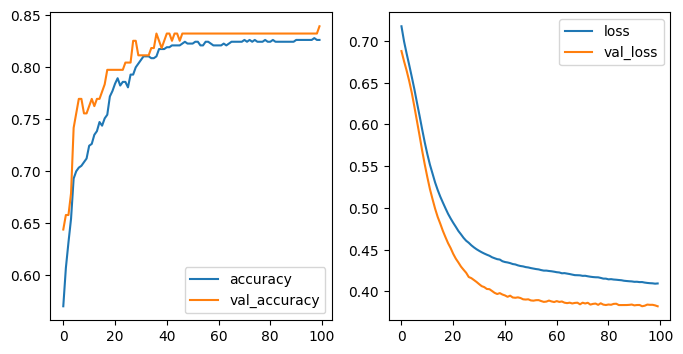

In [25]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.plot(tf_train_result.history['accuracy'])
ax1.plot(tf_train_result.history['val_accuracy'])
ax1.legend(['accuracy', 'val_accuracy'])

ax2.plot(tf_train_result.history['loss'])
ax2.plot(tf_train_result.history['val_loss'])
ax2.legend(['loss', 'val_loss'])

plt.show()

In [48]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Embarked_U'],
      dtype='object')

In [84]:
input_weights = tf_model.get_layer('dense').get_weights()[0]
input_weights.sum(axis=1)

array([-0.9579315 , -0.21510762,  1.6940281 , -0.20636845, -0.702669  ,
        1.0081553 , -1.2462004 ,  0.6250636 ,  0.2928555 ,  0.14474136],
      dtype=float32)

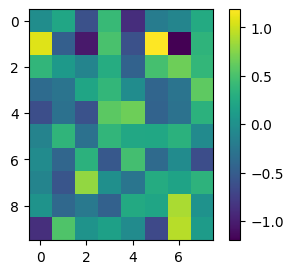

In [85]:
# show weights
plt.figure(figsize=(4,3))
plt.imshow(input_weights)
plt.colorbar()
plt.show()

looking at columns 0 and 5 of above heatmap, the 2nd feature (Sex) has high weight, which makes sense: females survived more. Last feature is embark_U which has very low weight - it does not matter to survival.

In [78]:
X.columns[input_weights[:,0].argsort()[::-1]]

Index(['Sex', 'Age', 'Embarked_S', 'Pclass', 'Embarked_C', 'Embarked_Q',
       'Fare', 'SibSp', 'Parch', 'Embarked_U'],
      dtype='object')

In [76]:
X.columns[input_weights[:,6].argsort()]

Index(['Sex', 'Parch', 'SibSp', 'Pclass', 'Embarked_C', 'Embarked_Q', 'Fare',
       'Age', 'Embarked_S', 'Embarked_U'],
      dtype='object')

In [73]:
X.columns[input_weights.sum(axis=1).argsort()[::-1]]

Index(['Age', 'Fare', 'Embarked_Q', 'Embarked_S', 'Embarked_U', 'SibSp', 'Sex',
       'Parch', 'Pclass', 'Embarked_C'],
      dtype='object')

## Using Keras Tuner
[https://keras.io/keras_tuner/getting_started/]

In [26]:
import keras_tuner

def build_ktmodel(hp):
  """ keras_tuner
  """
  init = hp.Choice("init", ['glorot_uniform', 'normal', 'uniform'])
  model = Sequential()
  # input layer
  model.add(Dense(units=hp.Int("units", min_value=8, max_value=64, step=16),
                  input_dim=X_train.shape[1],
                  activation=hp.Choice("activation", ["linear", "relu", "tanh"]),
                  kernel_initializer=init
                  )
            )
  model.add(Dropout(hp.Float("dr", min_value=0.0, max_value=0.5, step=0.1)))

  # hidden layers
  # for dim in units[1:]:
  #   model.add(Dense(dim), activation=activation, kernel_initializer=init)

  # model.add(Dropout(dr))

  # output layer
  model.add(Dense(1, activation='sigmoid',
                  kernel_initializer=init))

  model.compile(loss='binary_crossentropy',
                optimizer=hp.Choice("optimizer", ['adam', 'rmsprop']),
                metrics=['accuracy'])

  return model

# build_ktmodel(keras_tuner.HyperParameters())

tuner = keras_tuner.RandomSearch(
    hypermodel=build_ktmodel,
    objective="val_accuracy",
    max_trials=3,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="helloworld",
)
tuner.search_space_summary()

Search space summary
Default search space size: 5
init (Choice)
{'default': 'glorot_uniform', 'conditions': [], 'values': ['glorot_uniform', 'normal', 'uniform'], 'ordered': False}
units (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 16, 'sampling': 'linear'}
activation (Choice)
{'default': 'linear', 'conditions': [], 'values': ['linear', 'relu', 'tanh'], 'ordered': False}
dr (Float)
{'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.5, 'step': 0.1, 'sampling': 'linear'}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop'], 'ordered': False}


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Trial 3 Complete [00h 00m 31s]
val_accuracy: 0.832402229309082

Best val_accuracy So Far: 0.8435754179954529
Total elapsed time: 00h 01m 52s


In [28]:
tuner.results_summary()

Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
init: normal
units: 40
activation: linear
dr: 0.4
optimizer: rmsprop
Score: 0.8435754179954529

Trial 1 summary
Hyperparameters:
init: normal
units: 24
activation: relu
dr: 0.4
optimizer: adam
Score: 0.8435754179954529

Trial 2 summary
Hyperparameters:
init: uniform
units: 40
activation: relu
dr: 0.2
optimizer: rmsprop
Score: 0.832402229309082


In [29]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]
best_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 40)                  │             440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 481 (1.88 KB)

 Trainable params: 481 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

# PyTorch model

In [30]:
import torch
import torch.nn as nn
from torch.nn import Linear
import torch.optim as optim

class PtModel(nn.Module):
  def __init__(self, units=[8, 32], activation=nn.ReLU, dr=0.0):
    super().__init__()
    model = nn.Sequential()
    # input layer
    model.add_module('input layer', Linear(X_train.shape[1], units[0]))
    model.add_module('act', activation())
    model.add_module('dropout', nn.Dropout(p=dr))

    # hidden layers
    for i in range(1, len(units)-1):
      model.add_module(f'hidden layer {i}', Linear(units[i-1], units[i]))
      model.add_module(f'activation {i}', activation())
      model.add_module(f'dropout {i}', nn.Dropout(p=dr))

    # output layer
    model.add_module('output layer', Linear(units[-1], 1))
    model.add_module('sigmoid', nn.Sigmoid())

    self.model = model

  def forward(self, x):
    return self.model(x)


In [31]:
def train_model(model, train_loader, criterion, optimizer, epochs):
  model.train()

  losses = []
  for epoch in range(epochs):
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
      optimizer.zero_grad()
      preds = model(X_batch).squeeze()
      loss = criterion(preds, y_batch.float())
      loss.backward()
      optimizer.step()

      running_loss += loss.item()
      # print(f'epoch {epoch}: loss={loss.item()}')


    losses.append(running_loss)
    if(epoch % 10 == 0):
      print(f'Epoch {epoch}/{epochs}: training batch avg loss = {running_loss / len(train_loader)}')

  print(f'Epoch {epoch}/{epochs}: training batch avg loss = {running_loss / len(train_loader)}')
  return losses

def evalulate_model(model, test_loader):
  model.eval()
  correct = 0
  total = 0

  with torch.no_grad():
    for X_batch, y_batch in test_loader:
      preds = (model(X_batch).squeeze() > 0.5).float()
      correct += (preds==y_batch.float()).sum().item()
      total += y_batch.size(0)

  accuracy = correct / total * 100
  print(f'Test accuracy = {accuracy} %')

In [32]:
from torch.utils.data import DataLoader, TensorDataset

epochs = 100
batch_size = 16
lr = 1e-3
pt_model = PtModel(units=[8])

X_train_tensors = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensors = torch.tensor(y_train.values, dtype=torch.int32)
X_test_tensors = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensors = torch.tensor(y_test.values, dtype=torch.int32)
train_loader = DataLoader(TensorDataset(X_train_tensors, y_train_tensors), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensors, y_test_tensors), batch_size=batch_size, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimiser = optim.Adam(pt_model.parameters(), lr=lr)
losses = train_model(pt_model, train_loader,
                     criterion, optimiser, epochs=epochs)

Epoch 0/100: training batch avg loss = 16.48256474600898
Epoch 10/100: training batch avg loss = 15.656320116255019
Epoch 20/100: training batch avg loss = 15.301132445865207
Epoch 30/100: training batch avg loss = 15.261722442838881
Epoch 40/100: training batch avg loss = 15.088142644034491
Epoch 50/100: training batch avg loss = 15.03744559817844
Epoch 60/100: training batch avg loss = 15.065253962410821
Epoch 70/100: training batch avg loss = 14.999143335554335
Epoch 80/100: training batch avg loss = 15.007298194037544
Epoch 90/100: training batch avg loss = 15.021501244439019
Epoch 99/100: training batch avg loss = 14.940600458780924


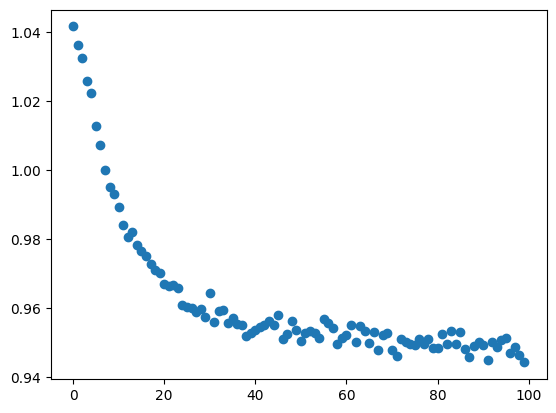

In [33]:
plt.scatter(range(epochs), [l/y_train.shape[0] for l in losses])

In [34]:
evalulate_model(pt_model, test_loader)

Test accuracy = 80.44692737430168 %


In [35]:
diff = pd.DataFrame({
    'preds': (pt_model(X_test_tensors).squeeze() > 0.5).numpy().astype(np.long),
    'labels': y_test_tensors.numpy().astype(np.long),
})
sum(abs(diff['preds']-diff['labels']))
# plt.scatter(len(diff), diff['preds']-diff['labels'])

35

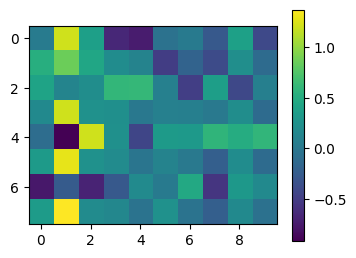

In [90]:
input_weights = pt_model.model[0].weight.data.detach().numpy()
plt.figure(figsize=(4,3))
plt.imshow(input_weights)
plt.colorbar()
plt.show()

this looks more consistent than the keras plot. It is obvious 2nd feature is most prominent.

In [91]:
X.columns[input_weights.sum(axis=0).argsort()[::-1]]

Index(['Sex', 'Age', 'Embarked_S', 'Pclass', 'SibSp', 'Fare', 'Embarked_C',
       'Embarked_U', 'Parch', 'Embarked_Q'],
      dtype='object')

In [92]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Embarked_U'],
      dtype='object')

# check features survival rate

In [177]:
df = pd.read_csv('./data/titanic.csv')
df['Age'] = df['Age'].fillna( df['Age'].median() )
df['Embarked'] = df['Embarked'].fillna('U')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [173]:
def col_stat(col):
  survival_count = df.query('Survived == 1')[col].value_counts().sort_index()
  mortal_count = df.query('Survived == 0')[col].value_counts().sort_index()
  survival_ratio = survival_count / (survival_count + mortal_count) * 100

  stats = pd.concat([survival_count, mortal_count, survival_ratio],
                          keys=['Survival Count', 'Mortality Count', 'Survaval Ratio %'], axis=1)
  stats = stats.fillna(0)
  print(stats)

  fig, (ax) = plt.subplots(1,1, figsize=(5,3))
  stats.plot(kind='bar', ax=ax)
  ax.set_xticklabels(stats.index, rotation=45)
  plt.show()
  return stats

        Survival Count  Mortality Count  Survaval Ratio %
Sex                                                      
female             233               81         74.203822
male               109              468         18.890815


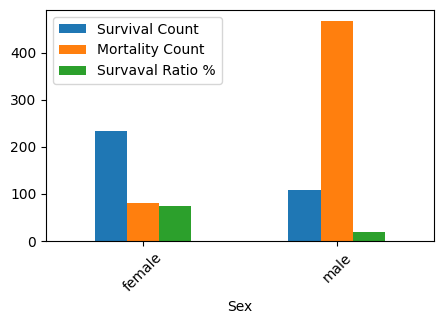

In [174]:
stats = col_stat('Sex')

       Survival Count  Mortality Count  Survaval Ratio %
Age                                                     
0.42              1.0              0.0               0.0
0.67              1.0              0.0               0.0
0.75              2.0              0.0               0.0
0.83              2.0              0.0               0.0
0.92              1.0              0.0               0.0
...               ...              ...               ...
66.00             0.0              1.0               0.0
70.00             0.0              2.0               0.0
70.50             0.0              1.0               0.0
71.00             0.0              2.0               0.0
74.00             0.0              1.0               0.0

[88 rows x 3 columns]


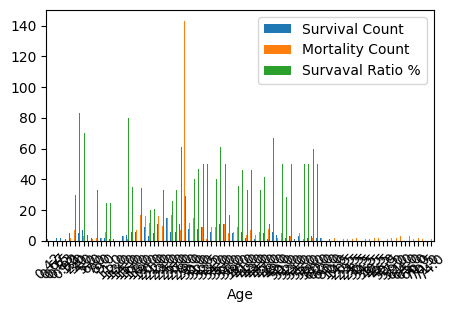

In [176]:
stats = col_stat('Age')

          Survival Count  Mortality Count  Survaval Ratio %
Embarked                                                   
C                     93             75.0         55.357143
Q                     30             47.0         38.961039
S                    217            427.0         33.695652
U                      2              0.0          0.000000


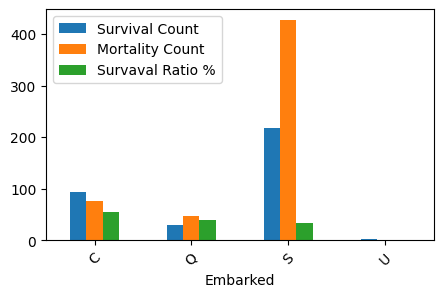

In [178]:
stats = col_stat('Embarked')

       Survival Count  Mortality Count  Survaval Ratio %
SibSp                                                   
0               210.0              398         34.539474
1               112.0               97         53.588517
2                13.0               15         46.428571
3                 4.0               12         25.000000
4                 3.0               15         16.666667
5                 0.0                5          0.000000
8                 0.0                7          0.000000


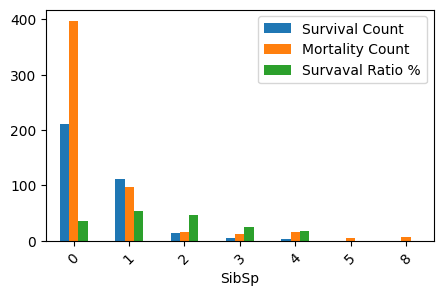

In [179]:
stats = col_stat('SibSp')

       Survival Count  Mortality Count  Survaval Ratio %
Parch                                                   
0               233.0              445         34.365782
1                65.0               53         55.084746
2                40.0               40         50.000000
3                 3.0                2         60.000000
5                 1.0                4         20.000000
4                 0.0                4          0.000000
6                 0.0                1          0.000000


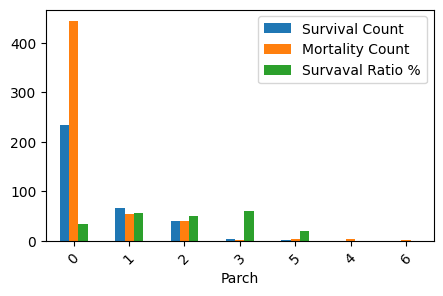

In [181]:
stats = col_stat('Parch')

          Survival Count  Mortality Count  Survaval Ratio %
Fare                                                       
0.0000               1.0             14.0          6.666667
6.9750               1.0              1.0         50.000000
7.1417               1.0              0.0          0.000000
7.2250               3.0              9.0         25.000000
7.2292               4.0             11.0         26.666667
...                  ...              ...               ...
69.5500              0.0              7.0          0.000000
73.5000              0.0              5.0          0.000000
77.2875              0.0              2.0          0.000000
211.5000             0.0              1.0          0.000000
221.7792             0.0              1.0          0.000000

[248 rows x 3 columns]


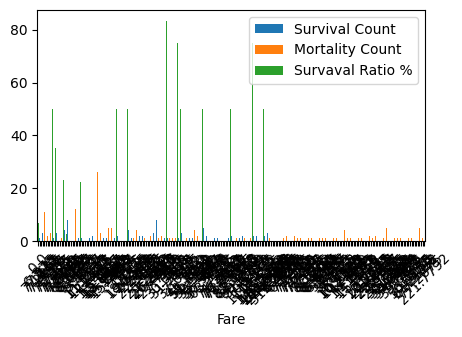

In [180]:
stats = col_stat('Fare')